# Bibliotecas

In [2]:
from skimage import io, color
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage import exposure
import pylab
from PIL import Image
import math
import skimage.measure
from os import scandir
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn import svm

# Funciones

## Convolución

In [3]:
def convolve2d(image, kernel):
    kernel = np.flipud(np.fliplr(kernel))  # Flip the kernel
    output = np.zeros_like(image)  # convolution output
    kernel_size = kernel.shape[0]
    border = math.floor(kernel_size / 2) * 2 
    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + border, image.shape[1] + border))
    image_padded[border-1:-1, border-1:-1] = image
    for x in range(image.shape[1]):  # Loop over every pixel of the image
        for y in range(image.shape[0]):
            #element-wise multiplication of the kernel and the image
            output[y, x] = (kernel * image_padded[y:y + kernel_size, x:x + kernel_size]).sum()
    return output

## Mostrar imagen

In [4]:
def showImg(img, cmap=plt.cm.gray):
  plt.imshow(img,cmap)
  plt.axis('off')
  plt.show()

## Fabrica de Kernels

In [5]:
def kernelFactory(kernel_choosed):
    if 'bottom-sobel' in kernel_choosed:
        kernel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
        return kernel
    elif 'left-sobel' in kernel_choosed:
        kernel = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
        return kernel
    elif 'right-sobel' in kernel_choosed:
        kernel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
        return kernel
    elif 'top-sobel' in kernel_choosed:
        kernel = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
        return kernel
    elif 'blur' in kernel_choosed:
        kernel = 1/16 * np.array([[1,2,1],[2,4,2],[1,2,1]])
        return kernel
    elif 'laplace' in kernel_choosed:
        kernel = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
        return kernel
    elif 'uniform' in kernel_choosed:
        kernel = np.array([[0,1,0],[1,1,1],[0,1,0]])
        return kernel
    elif 'x-prewitt' in kernel_choosed:
        kernel = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
        return kernel
    elif 'y-prewitt' in kernel_choosed:
        kernel = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
        return kernel
    elif 'sharpen' in kernel_choosed:
        kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
        return kernel
    elif 'emboss' in kernel_choosed:
        kernel = np.array([[-2,-1,0],[-1,1,1],[0,1,2]])
        return kernel
    elif 'outline' in kernel_choosed:
        kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
        return kernel
    else:
        print("Kernel not found")


## Sub imagen

In [6]:
def subImagen(imagen, x, y, delta):
  sub_imagen = imagen[x:x+delta,y:y+delta]
  return sub_imagen

## ReLU

In [7]:
def ReLU(x,bias=0):
  return max(0,x+bias)

## imgToBin

In [8]:
def imgToBin(image):
  output = np.zeros_like(image)
  for x in range(image.shape[1]):  # Loop over every pixel of the image
    for y in range(image.shape[0]):
      z = image[y, x] 
      if z < 0.5:
        output[y,x] = -1
      else:
        output[y,x] = 1
  return output


## Pooling

In [9]:
def pooling(image, size=2, stride=2,type_pooling='max' ):
  if 'max' in type_pooling:
    pooling_img=skimage.measure.block_reduce(image, (size,stride), np.max)
  else:
    pooling_img=skimage.measure.block_reduce(image, (size,stride), np.mean)
  return pooling_img


## GetFiles

In [10]:
def getFiles(path):
    files = [arch.name for arch in scandir(path) if arch.is_file()]
    if '.DS_Store' in files:
        files.remove('.DS_Store')
    #print("Files: ",files)
    return files

Height= 375 Width= 500


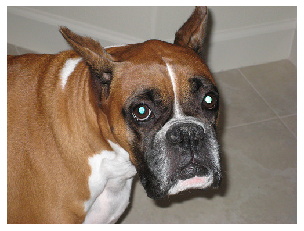

(375, 500, 3)


In [11]:
im = Image.open('boxer/train/boxer_147.jpg')
print("Height=", im.height, "Width=", im.width)
imrgbgarr = np.array(im)
#imgarr = color.rgb2gray(imgarr) 
showImg(imrgbgarr)
print(imrgbgarr.shape)## Abrir imagen

# Proceso de feature selection

## Imagen BW

Height= 224 Width= 224


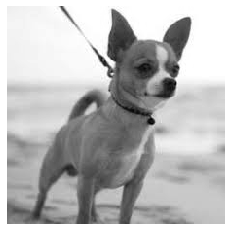

(72, 72)


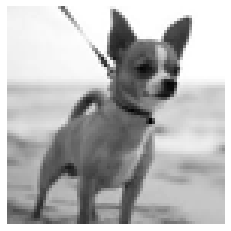

In [36]:
#im = Image.open('chihuahua/train/chihuahua_88.jpg')
#im = Image.open('beagle/train/beagle_200.jpg')
#im = Image.open('boxer/train/boxer_137.jpg')
im = Image.open('chihuahuanew.jpg')
print("Height=", im.height, "Width=", im.width)
imgarr = np.array(im)
imgarr = color.rgb2gray(imgarr) 
showImg(imgarr)

im = im.resize((72, 72))
imgarr = np.array(im)
imgarr = color.rgb2gray(imgarr) 
print(imgarr.shape)
showImg(imgarr)

#new_image = im.resize((72, 72))
#imgarrs = np.array(new_image)
#imgarrs = color.rgb2gray(imgarrs) 
#showImg(imgarrs)
#print(imgarrs.shape)


##  Filtro 1

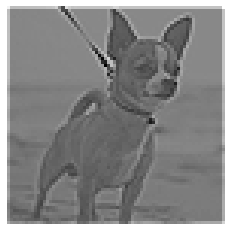

In [37]:
kernel = kernelFactory('sharpen')
imagen_f1 = convolve2d(imgarr,kernel)
showImg(imagen_f1)

## Pooling 1

(24, 24)


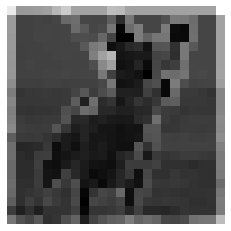

In [38]:
imagen_p1 = pooling(imagen_f1,3,3,"max")
print(imagen_p1.shape)
showImg(imagen_p1)

## Filtro 2

[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]
(24, 24)


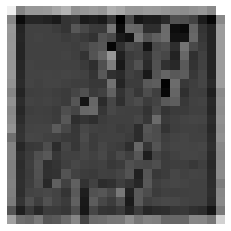

In [39]:
kernel = kernelFactory('outline')
print(kernel)
imagen_f2 = convolve2d(imagen_p1,kernel)
print(imagen_f2.shape)
showImg(imagen_f2)

## Pooling 2

(12, 12)


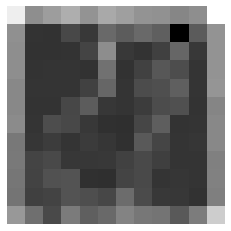

In [40]:
imagen_p2 = pooling(imagen_f2,2,2,"max")
print(imagen_p2.shape)
showImg(imagen_p2)

## Vector caracteristica

In [41]:
v1 = imagen_p2.flatten()
df_v = pd.DataFrame(data=v1)
df_v.values.reshape(-1,1)

array([[ 1.74079537e+01],
       [ 8.55516627e+00],
       [ 9.93725490e+00],
       [ 1.14823529e+01],
       [ 8.97980314e+00],
       [ 1.10065400e+01],
       [ 1.01222365e+01],
       [ 8.97342000e+00],
       [ 8.84335255e+00],
       [ 7.78073098e+00],
       [ 8.56273294e+00],
       [ 1.90000000e+01],
       [ 8.66412196e+00],
       [ 1.01960784e-01],
       [ 5.49019608e-02],
       [ 2.07450980e+00],
       [ 5.68627451e-01],
       [ 5.19630863e+00],
       [ 3.94839216e+00],
       [ 5.13372941e+00],
       [ 4.21550706e+00],
       [-4.62888118e+00],
       [ 3.77912706e+00],
       [ 9.00000000e+00],
       [ 8.56192235e+00],
       [ 1.22854902e-02],
       [ 2.35294118e-02],
       [ 8.23529412e-02],
       [ 1.73851961e+00],
       [ 8.45637098e+00],
       [ 6.96935686e-01],
       [ 1.32594118e-01],
       [ 1.32811843e+00],
       [ 4.87350471e+00],
       [ 7.14129412e-01],
       [ 9.00000000e+00],
       [ 8.52982235e+00],
       [ 1.05384314e-01],
       [ 1.7

# Proceso n-Dogs

## Get Train

In [19]:
paths = ["boxer/train/","beagle/train/","chihuahua/train/"]
train = []

clase = 0
for path in paths:
    dogs = getFiles(path)
    #print(dogs[0:5])
    print("Fase {} inciada".format(path))
    for dog in dogs:
        im = Image.open(path+dog)
        im = im.resize((72, 72))
        #print("Height=", im.height, "Width=", im.width)
        imgarr = np.array(im)
        imgarr = color.rgb2gray(imgarr) 
        #Filtro 1
        kernel = kernelFactory('sharpen')
        imagen_f1 = convolve2d(imgarr,kernel)
        #Pooling 1
        imagen_p1 = pooling(imagen_f1,3,3,"max")
        #Filter 2
        kernel = kernelFactory('outline')
        #print(kernel)
        imagen_f2 = convolve2d(imagen_p1,kernel)
        #Pooling 2
        imagen_p2 = pooling(imagen_f2,2,2,"max")
        # Vector
        v = imagen_p2.flatten()
        v = np.append(v,clase)
        #print(v)
        train.append(v)
    clase+=1

print(len(train))


Fase boxer/train/ inciada
Fase beagle/train/ inciada
Fase chihuahua/train/ inciada
510


## Get Test

In [20]:
paths = ["boxer/test/","beagle/test/","chihuahua/test/"]
test = []
#test = pd.DataFrame()

clase = 0
for path in paths:
    dogs = getFiles(path)
    print("Ruta: {}, Raza: {}, nPerros: {}".format(path, clase,len(dogs)))
    #print(dogs[0:5])
    print("Fase {} inciada".format(path))
    for dog in dogs:
        im = Image.open(path+dog)
        im = im.resize((72, 72))
        #print("Height=", im.height, "Width=", im.width)
        imgarr = np.array(im)
        imgarr = color.rgb2gray(imgarr) 
        #Filtro 1
        kernel = kernelFactory('sharpen')
        imagen_f1 = convolve2d(imgarr,kernel)
        #Pooling 1
        imagen_p1 = pooling(imagen_f1,3,3,"max")
        #Filter 2
        kernel = kernelFactory('outline')
        #print(kernel)
        imagen_f2 = convolve2d(imagen_p1,kernel)
        #Pooling 2
        imagen_p2 = pooling(imagen_f2,2,2,"max")
        # Vector
        v = imagen_p2.flatten()
        v = np.append(v,clase)
        #print(v)
        test.append(v)
    clase+=1

print(len(test))


Ruta: boxer/test/, Raza: 0, nPerros: 30
Fase boxer/test/ inciada
Ruta: beagle/test/, Raza: 1, nPerros: 30
Fase beagle/test/ inciada
Ruta: chihuahua/test/, Raza: 2, nPerros: 30
Fase chihuahua/test/ inciada
90


In [21]:
print(len(train))
df_train = pd.DataFrame(data=train)
df_train.head()

510


0          1         2         3         4         5         6    \
0  10.954643   4.737342  5.074121  5.450098  5.726541  5.791830  6.345408   
1   2.424438   0.862510  1.539598  0.928204  2.527407  2.140086  2.062075   
2   5.158316  10.025488  9.000000  9.000000  9.000000  9.000000  9.718886   
3   8.824536   5.518468  5.134915  4.324844  4.329638  3.998227  6.080530   
4   5.249245   1.745675  1.650848  0.942285  1.908781  1.722362  3.184457   

        7         8         9   ...        135       136       137        138  \
0  6.332857  7.131647  5.396455 ...   9.424812  5.939572  5.072826   4.978487   
1  1.760560  0.847714  1.273462 ...   4.406651  4.974067  3.901149   4.931332   
2  8.550747  8.947437  2.576875 ...   3.584001  3.234616  4.673784   8.354273   
3  4.180158  3.432545  4.671483 ...   7.493425  7.402989  6.893711  10.184918   
4  1.702597  5.596868  5.911304 ...   8.871206  3.930211  4.063275   2.592973   

        139       140       141       142        143  144  
0  5.163105  5.388947  5.148546  4.571443   8.822330  0.0  
1  4.708021  6.039265  5.772008  5.767682  10.689522  0.0  
2  3.883650  4.718235  4.262907  5.581701   4.001878  0.0  
3  4.780920  3.407658  4.514833  2.406110  13.199628  0.0  
4  5.235037  4.498709  3.580563  3.440121   6.721469  0.0  

[5 rows x 145 columns]

In [22]:
print(len(test))
df_test = pd.DataFrame(data=test)
df_test.head()

90


0         1         2         3         4          5         6    \
0  11.403133  8.664802  7.352098  5.786804  5.604728   4.147805  6.527065   
1  10.947565  6.345385  6.478987  6.513242  6.205084   5.855912  5.923745   
2   9.866415  4.056775  5.419858  4.456127  3.558238   4.448318  2.893080   
3  14.616262  7.235184  7.758010  7.530111  7.577785   7.582772  7.553691   
4  18.388992  8.912429  9.625939  8.950428  9.356748  11.079069  9.509123   

        7          8          9   ...        135       136        137  \
0  3.569612   3.416314   5.582273 ...   4.824287  6.442658  10.358899   
1  6.015310   6.051681   5.808631 ...   5.444987  5.274598   5.932804   
2  3.709540   3.567146   5.982541 ...   4.628080  5.033808   4.072186   
3  7.404149   7.245676   7.281600 ...   4.995769  4.312024   4.087153   
4  8.982464  11.885625  11.726986 ...   2.786595  3.734496   8.969823   

        138        139       140       141       142        143  144  
0  9.024544   7.982291  8.916420  8.765656  6.378160  11.067204  0.0  
1  5.197389   4.792703  4.720440  5.908372  6.886473   7.555060  0.0  
2  4.330249   4.283506  3.690152  4.312383  4.326887   6.854453  0.0  
3  6.969584   7.161380  2.407527  3.004150  2.511611   4.014398  0.0  
4  4.153534  10.052875  4.399169  4.053880  4.489856  10.878293  0.0  

[5 rows x 145 columns]

# Clasificación

In [23]:
x_train = df_train.iloc[:,0:143]
y_train = df_train.iloc[:,-1]
x_test = df_test.iloc[:,0:143]
y_test = df_test.iloc[:,-1]
print(x_train.head())

         0          1         2         3         4         5         6    \
0  10.954643   4.737342  5.074121  5.450098  5.726541  5.791830  6.345408   
1   2.424438   0.862510  1.539598  0.928204  2.527407  2.140086  2.062075   
2   5.158316  10.025488  9.000000  9.000000  9.000000  9.000000  9.718886   
3   8.824536   5.518468  5.134915  4.324844  4.329638  3.998227  6.080530   
4   5.249245   1.745675  1.650848  0.942285  1.908781  1.722362  3.184457   

        7         8         9      ...          133       134       135  \
0  6.332857  7.131647  5.396455    ...     4.127480  5.618840  9.424812   
1  1.760560  0.847714  1.273462    ...     4.408038  4.596393  4.406651   
2  8.550747  8.947437  2.576875    ...     3.455996  3.318541  3.584001   
3  4.180158  3.432545  4.671483    ...     9.487351  7.473005  7.493425   
4  1.702597  5.596868  5.911304    ...     3.487621  3.239389  8.871206   

        136       137        138       139       140       141       142  
0  5.939572

In [24]:
classifier = MLPClassifier(solver='sgd', hidden_layer_sizes=(5, 2), 
                           random_state=1, activation='relu', max_iter=400)           
classifier.fit(x_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=400,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
y_pred= classifier.predict(x_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[ 9  9 12]
 [ 6 11 13]
 [ 6  6 18]]
Accuracy: 0.4222222222222222


In [26]:
classifier2=svm.SVC(kernel='rbf')
classifier2.fit(x_train, y_train)

#training the algorithconfusion_matrix = confusion_matrix(y_test, y_pred2)
from sklearn.metrics import confusion_matrix
y_pred2 = classifier2.predict(x_test)
confusion_matrix = confusion_matrix(y_test, y_pred2)
print(confusion_matrix)
desempeno_svm=metrics.accuracy_score(y_test, y_pred2)
print("Accuracy SVM:",desempeno_svm)


[[17  9  4]
 [12 15  3]
 [ 8 11 11]]
Accuracy SVM: 0.4777777777777778


In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
clf = GaussianNB().fit(x_train, y_train)
y_pred= clf.predict(x_test)
m=confusion_matrix(y_test, y_pred)
print(m)
desempeno_gnb=metrics.accuracy_score(y_test, y_pred)
print("GaussianNB Accuracy:",desempeno_gnb)

[[14  9  7]
 [ 9 14  7]
 [ 6 11 13]]
GaussianNB Accuracy: 0.45555555555555555


In [42]:
#print(df_v.T)
df_vt=df_v.T
x_trainv = df_vt.iloc[:,0:143]
y_pred2 = classifier2.predict(x_trainv)
print(y_pred2)
if y_pred2 == 0:
    print("boxer")
elif y_pred2==1:
    print("beagle")
else:
    print("chihuahua")


[2.]
chihuahua
